In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
epsilon=0.005

In [4]:
#rifai tutto per il dataset Dataset\Dataset_Fpkm_filtered.tsv e Dataset\Dataset_tpm_filtered.tsv
df_fpkm = pd.read_csv('../dataset/Dataset_Fpkm.tsv', sep='\t')
df_tpm = pd.read_csv('../dataset/Dataset_tpm.tsv', sep='\t')
df_fpkm_uq =  pd.read_csv('../dataset/Dataset_fpkm_uq.tsv', sep='\t')

df_fpkm

,gene_id,8aac9904-a75b-4aa7-8229-2e9a84b5c8ed,2c95a51c-5ac7-4137-93c6-9fdd8ea91b64,cd23df50-032f-4ebc-af00-4a404e528111,b815eec3-1e09-4cb9-9dcc-40924b721328,59d646f1-8088-4ef4-81a0-92965baa0ce3,47e14032-8560-48f6-8011-cddfd2777bc8,a243ebaa-1ce3-4dc9-b805-90ab7f5b7b19,25061bb6-2e72-4d8b-b42d-e42553f71a65,e070fb7d-674e-4863-a65a-a5be0419d67b,...,8b477ce8-817c-4268-b24e-1a09ebaa4939,400dc107-3381-4fa9-81e8-76fce69d853c,50cd452e-09bb-451b-807d-3689116137c7,0f16dd07-0701-417d-8861-c2e6ceff93b7,5e173afc-9eaa-49a3-9803-ced9d1e6617d,06fde02a-86af-4e12-b891-b909b30cccd6,a769ff77-d6a4-4df2-a3e5-f301b28b46f9,b9a0e7ef-e308-4c68-94b1-dbcd04848da3,387a5363-b004-4b50-bcd6-40939af10ce4,7f870732-738c-4037-8fac-102fc0658ea8
0,ENSG00000000003.15,34.0554,7.1174,10.7464,23.6064,31.9914,23.3202,26.5630,18.4295,21.9253,...,10.2156,65.3160,11.1788,15.9182,12.2622,43.4345,36.6383,9.6294,11.5048,19.0988
1,ENSG00000000005.6,0.1135,0.0405,0.0593,0.0377,0.1067,0.0000,0.1905,0.0097,0.3532,...,0.0588,0.1882,0.0000,0.1201,0.0690,0.1393,0.0279,0.0167,0.1171,0.0647
2,ENSG00000000457.14,2.6279,1.5785,2.2873,5.2639,2.5024,2.8143,0.6535,1.8786,0.8639,...,3.4250,1.9646,2.0040,1.7427,2.3579,3.4753,2.3990,1.8045,1.7693,1.6878
3,ENSG00000000460.17,2.7641,1.4075,1.9631,3.3294,1.3194,1.8096,0.7534,0.7388,1.3453,...,1.3978,1.8631,1.6571,2.1873,1.7845,6.7112,5.0277,1.3203,1.5688,1.6323
4,ENSG00000000938.13,1.1535,1.1981,23.4732,0.4116,2.1365,1.5040,1.1637,1.1220,2.9001,...,4.5458,0.7031,2.4677,0.3669,1.8827,0.3071,1.0520,1.1672,3.0573,1.0734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16239,ENSG00000259305.6,0.0818,0.3608,0.1100,0.0630,0.1189,0.1472,0.1697,0.1621,0.2971,...,0.0764,0.0922,0.1809,0.1338,0.0597,0.0776,0.2074,0.1485,0.0474,0.1154
16240,ENSG00000259384.7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0115,0.0000,0.0000,0.0000
16241,ENSG00000259399.1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
16242,ENSG00000259431.6,2.9719,2.6433,0.8361,2.1162,2.0758,4.4018,1.3017,1.3211,1.1469,...,1.8740,0.5836,1.0993,2.4705,1.1685,2.6189,1.3006,2.1458,1.5095,5.9157


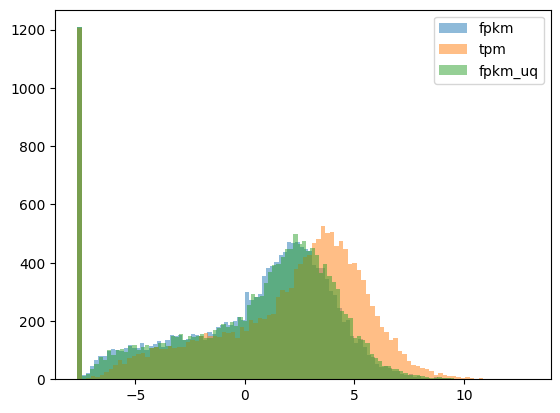

In [5]:

df_fpkm.iloc[:, 1:] = df_fpkm.iloc[:, 1:].apply(lambda x: x + epsilon).map(lambda x: math.log(x, 2))
df_fpkm['fpkm_median'] = df_fpkm.iloc[:, 1:].median(axis=1)

df_tpm.iloc[:, 1:] = df_tpm.iloc[:, 1:].apply(lambda x: x + epsilon).map(lambda x: math.log(x, 2))
df_tpm['tpm_median'] = df_tpm.iloc[:, 1:].median(axis=1)

df_fpkm_uq.iloc[:, 1:] = df_fpkm_uq.iloc[:, 1:].apply(lambda x: x + epsilon).map(lambda x: math.log(x, 2))
df_fpkm_uq['fpkm_uq_median'] = df_fpkm_uq.iloc[:, 1:].median(axis=1)

#plotta la distribuzione dei valori medi
fig, ax = plt.subplots()
ax.hist(df_fpkm['fpkm_median'], bins=100, alpha=0.5, label='fpkm')
ax.hist(df_tpm['tpm_median'], bins=100, alpha=0.5, label='tpm')
ax.hist(df_fpkm_uq['fpkm_uq_median'], bins=100, alpha=0.5, label='fpkm_uq')
ax.legend()
plt.show()

In [3]:
dataset = pd.read_csv('..\Dataset\Dataset_median.tsv', sep='\t')
dataset.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\39379\AppData\Local\Temp\ipykernel_20332\131185854.py:1: SyntaxWarning: invalid escape sequence '\D'
  dataset = pd.read_csv('..\Dataset\Dataset_median.tsv', sep='\t')


,gene_id,fpkm_median,tpm_median,fpkm_uq_median
0,ENSG00000000003.15,4.062985,5.543366,4.292598
1,ENSG00000000005.6,-3.925769,-2.475535,-3.733124
2,ENSG00000000457.14,0.873892,2.396543,1.063089
3,ENSG00000000460.17,0.652142,2.088786,0.803392
4,ENSG00000000938.13,0.612022,2.081715,0.757621


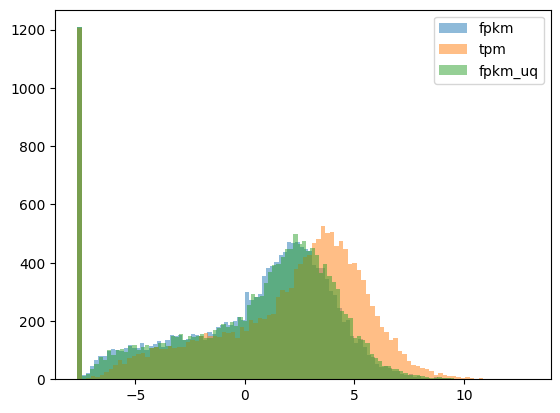

In [9]:
# istogramma colonna 'fpkm_median' tpm_median' e 'fpkm_uq_median'
fig, ax = plt.subplots()
ax.hist(dataset['fpkm_median'], bins=100, alpha=0.5, label='fpkm')
ax.hist(dataset['tpm_median'], bins=100, alpha=0.5, label='tpm')
ax.hist(dataset['fpkm_uq_median'], bins=100, alpha=0.5, label='fpkm_uq')
ax.legend()
plt.show()


In [ ]:
#crea un dataframe con i valori medi
df = pd.DataFrame()
df['gene_id'] = df_fpkm['gene_id']
df['fpkm_median'] = df_fpkm['fpkm_median']
df['tpm_median'] = df_tpm['tpm_median']
df['fpkm_uq_median'] = df_fpkm_uq['fpkm_uq_median']
# df.to_csv('..\Dataset\Dataset_median.tsv', sep='\t', index=False)
median = df


KeyError: 'fpkm_median'

In [ ]:
df = pd.read_csv('..\Dataset\gx_bert.csv', sep=',')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Danilo\AppData\Local\Temp\ipykernel_7944\1392790548.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('..\Dataset\gx_bert.csv', sep=',')


In [ ]:
merged_df = pd.merge(df, median, on="gene_id", how="inner")
merged_df

,Unnamed: 0.1,Unnamed: 0,gene_name,gene_id,gene_type,TSS,genomic_strand,chromosome_name,sequence,split,labels,fpkm_uq_unstranded_median,fpkm_median,tpm_median,fpkm_uq_median
0,0,ENSG00000121410,A1BG,ENSG00000121410.12,protein_coding,58347673,-,chr19,[0 0 0 ... 3 2 1],train,0.128766,0.04210,-4.563199,-3.172669,-4.445362
1,1,ENSG00000148584,A1CF,ENSG00000148584.15,protein_coding,50885633,-,chr10,[1 1 3 ... 0 0 1],train,-1.442332,0.00190,-7.243318,-6.687800,-7.179188
2,2,ENSG00000175899,A2M,ENSG00000175899.15,protein_coding,9115927,-,chr12,[1 2 0 ... 2 2 1],train,1.172033,43.39825,5.214346,6.680884,5.391613
3,3,ENSG00000166535,A2ML1,ENSG00000166535.20,protein_coding,8822627,+,chr12,[3 1 3 ... 1 1 1],train,-1.300226,0.21115,-2.501443,-1.024150,-2.346665
4,4,ENSG00000128274,A4GALT,ENSG00000128274.17,protein_coding,42720879,-,chr22,[1 0 1 ... 2 0 3],train,0.157178,4.61060,2.025064,3.517855,2.194465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16239,16239,ENSG00000235961,PNMA6A,ENSG00000235961.6,protein_coding,153072454,+,chrX,[1 1 3 ... 2 2 0],train,-0.499574,1.54190,0.470094,1.984990,0.647637
16240,16240,ENSG00000102030,NAA10,ENSG00000102030.16,protein_coding,153935037,-,chrX,[1 0 2 ... 1 2 3],train,0.926938,4.64980,2.030513,3.496705,2.195159
16241,16241,ENSG00000166160,OPN1MW2,ENSG00000166160.9,protein_coding,154219756,+,chrX,[0 3 3 ... 0 2 3],train,-1.463212,0.00000,-7.643856,-7.643856,-7.643856
16242,16242,ENSG00000203870,SMIM9,ENSG00000203870.5,protein_coding,154834662,-,chrX,[0 3 3 ... 1 1 1],train,-1.463212,0.00000,-7.643856,-7.643856,-7.643856


In [ ]:
#Normalizza i valore di fpkm, tpm e fpkm_uq fittando solo sul train guardando la colonna 'split'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(merged_df[merged_df['split']=='train'][['fpkm_median', 'tpm_median', 'fpkm_uq_median']])
merged_df[['fpkm_median', 'tpm_median', 'fpkm_uq_median']] = scaler.transform(merged_df[['fpkm_median', 'tpm_median', 'fpkm_uq_median']])
merged_df




,Unnamed: 0.1,Unnamed: 0,gene_name,gene_id,gene_type,TSS,genomic_strand,chromosome_name,sequence,split,labels,fpkm_uq_unstranded_median,fpkm_median,tpm_median,fpkm_uq_median
0,0,ENSG00000121410,A1BG,ENSG00000121410.12,protein_coding,58347673,-,chr19,[0 0 0 ... 3 2 1],train,0.128766,0.04210,-1.262580,-1.161075,-1.262943
1,1,ENSG00000148584,A1CF,ENSG00000148584.15,protein_coding,50885633,-,chr10,[1 1 3 ... 0 0 1],train,-1.442332,0.00190,-1.971127,-2.026127,-1.978988
2,2,ENSG00000175899,A2M,ENSG00000175899.15,protein_coding,9115927,-,chr12,[1 2 0 ... 2 2 1],train,1.172033,43.39825,1.322323,1.263824,1.313562
3,3,ENSG00000166535,A2ML1,ENSG00000166535.20,protein_coding,8822627,+,chr12,[3 1 3 ... 1 1 1],train,-1.300226,0.21115,-0.717511,-0.632337,-0.713251
4,4,ENSG00000128274,A4GALT,ENSG00000128274.17,protein_coding,42720879,-,chr22,[1 0 1 ... 2 0 3],train,0.157178,4.61060,0.479168,0.485422,0.476163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16239,16239,ENSG00000235961,PNMA6A,ENSG00000235961.6,protein_coding,153072454,+,chrX,[1 1 3 ... 2 2 0],train,-0.499574,1.54190,0.068078,0.108194,0.071017
16240,16240,ENSG00000102030,NAA10,ENSG00000102030.16,protein_coding,153935037,-,chrX,[1 0 2 ... 1 2 3],train,0.926938,4.64980,0.480608,0.480217,0.476345
16241,16241,ENSG00000166160,OPN1MW2,ENSG00000166160.9,protein_coding,154219756,+,chrX,[0 3 3 ... 0 2 3],train,-1.463212,0.00000,-2.077018,-2.261407,-2.100694
16242,16242,ENSG00000203870,SMIM9,ENSG00000203870.5,protein_coding,154834662,-,chrX,[0 3 3 ... 1 1 1],train,-1.463212,0.00000,-2.077018,-2.261407,-2.100694


# Methylation median

In [14]:
import pandas as pd

df=pd.read_csv('..\Dataset\methylation_filtered.csv', sep=',')
df

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\dany0\AppData\Local\Temp\ipykernel_19748\3856438450.py:3: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv('..\Dataset\methylation_filtered.csv', sep=',')


,cg_id,6264e699-d40b-4ebc-b443-0a0edcb220dc,ba68f2cf-9271-41fd-9655-1fac7681f588,d0673efd-3315-4dd5-8ab6-912bfa07dceb,40635bf3-d8ba-4833-b623-547e55e5d07e,09c77947-a333-4392-b18d-a6c1f08764a1,bbad2efe-e9c7-4f8f-924b-ebbbe4c181d4,d77ef9cf-f8e6-4ee9-8d4f-1106885f6b06,fe0e3851-d8cb-4533-9536-b4826cd25f87,df53c3c0-3605-4d2b-bdc7-96d9beab27ea,...,4c18d9cf-4af4-4a86-8b1c-f78795fbbd7e,9af2248a-d86a-4277-93b4-8eba5a39bd3c,02594e5e-8751-47c1-9245-90c66984b665,872d2922-7292-4681-adb7-d3b267eccbe7,c183d3fb-2eee-44f8-890e-b9bf907141e6,5d36676e-4140-44b5-aa0e-b2af092b7dc0,b6b607cd-67b8-4c04-a212-a4e8c0743f05,0d5e232d-5aa2-4f6f-be58-ffd5f15ee0b8,b4225c44-b9b6-46c5-aabf-7b0d9a9fe20b,a5030259-cf9c-4a58-8710-b9da8ee59320
0,cg00000292,0.605340,0.058162,0.877318,0.940889,0.810086,0.916845,0.779235,0.773485,0.933854,...,0.873594,0.775427,0.900892,0.397515,0.534723,0.908606,0.797751,0.949653,0.950152,0.954801
1,cg00002426,0.047838,0.016493,0.041167,0.922633,0.103832,0.685613,0.219663,0.149864,0.139051,...,0.035281,0.800353,0.616587,0.036478,0.042228,0.022875,0.295798,0.018958,0.957308,0.115651
2,cg00003994,0.029691,0.247573,0.031503,0.037621,0.022757,0.012381,0.011538,0.012964,0.218298,...,0.020271,0.075042,0.019306,0.016976,0.365977,0.015142,0.018152,0.458334,0.039994,0.064219
3,cg00005847,0.842209,0.282497,0.683714,0.903991,0.812266,0.860653,0.417115,0.751381,0.620082,...,0.793169,0.881865,0.790049,0.882217,0.910726,0.517588,0.381840,0.911336,0.468563,0.876845
4,cg00006414,0.030500,0.021845,0.034040,0.031495,0.028558,0.034952,0.035809,0.028738,0.045980,...,0.026173,0.039547,0.028511,0.027192,0.031255,0.027094,0.041994,0.019404,0.038303,0.090805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27573,cg27657283,0.035668,0.013302,0.028474,0.025142,0.022941,0.026853,0.009041,0.017217,0.022743,...,0.015633,0.021377,0.018945,0.014884,0.020162,0.016568,0.020444,0.014127,0.029938,0.080898
27574,cg27661264,0.154812,0.028799,0.408730,0.319114,0.281500,0.235815,0.321539,0.155187,0.162235,...,0.086428,0.369042,0.286567,0.057520,0.834345,0.393279,0.072380,0.065361,0.653332,0.108482
27575,cg27662379,0.008344,0.009053,0.014777,0.007936,0.009339,0.021392,0.012413,0.007944,0.011704,...,0.012038,0.026748,0.010153,0.008892,0.011082,0.011172,0.008704,0.006621,0.012631,0.025501
27576,cg27662877,0.021433,0.021210,0.035486,0.028150,0.023038,0.034218,0.020690,0.017461,0.022522,...,0.024024,0.056233,0.018505,0.025846,0.015794,0.026871,0.021093,0.021456,0.044660,0.064975


In [15]:
df.dropna(inplace=True)
df

,cg_id,6264e699-d40b-4ebc-b443-0a0edcb220dc,ba68f2cf-9271-41fd-9655-1fac7681f588,d0673efd-3315-4dd5-8ab6-912bfa07dceb,40635bf3-d8ba-4833-b623-547e55e5d07e,09c77947-a333-4392-b18d-a6c1f08764a1,bbad2efe-e9c7-4f8f-924b-ebbbe4c181d4,d77ef9cf-f8e6-4ee9-8d4f-1106885f6b06,fe0e3851-d8cb-4533-9536-b4826cd25f87,df53c3c0-3605-4d2b-bdc7-96d9beab27ea,...,4c18d9cf-4af4-4a86-8b1c-f78795fbbd7e,9af2248a-d86a-4277-93b4-8eba5a39bd3c,02594e5e-8751-47c1-9245-90c66984b665,872d2922-7292-4681-adb7-d3b267eccbe7,c183d3fb-2eee-44f8-890e-b9bf907141e6,5d36676e-4140-44b5-aa0e-b2af092b7dc0,b6b607cd-67b8-4c04-a212-a4e8c0743f05,0d5e232d-5aa2-4f6f-be58-ffd5f15ee0b8,b4225c44-b9b6-46c5-aabf-7b0d9a9fe20b,a5030259-cf9c-4a58-8710-b9da8ee59320
2,cg00003994,0.029691,0.247573,0.031503,0.037621,0.022757,0.012381,0.011538,0.012964,0.218298,...,0.020271,0.075042,0.019306,0.016976,0.365977,0.015142,0.018152,0.458334,0.039994,0.064219
3,cg00005847,0.842209,0.282497,0.683714,0.903991,0.812266,0.860653,0.417115,0.751381,0.620082,...,0.793169,0.881865,0.790049,0.882217,0.910726,0.517588,0.381840,0.911336,0.468563,0.876845
4,cg00006414,0.030500,0.021845,0.034040,0.031495,0.028558,0.034952,0.035809,0.028738,0.045980,...,0.026173,0.039547,0.028511,0.027192,0.031255,0.027094,0.041994,0.019404,0.038303,0.090805
5,cg00007981,0.015019,0.010647,0.013409,0.011366,0.016956,0.025126,0.010337,0.010572,0.013297,...,0.012930,0.023146,0.016226,0.011689,0.016117,0.010386,0.011332,0.009945,0.020891,0.018369
6,cg00008493,0.897510,0.988061,0.901947,0.981684,0.982356,0.987163,0.758343,0.982593,0.987791,...,0.991646,0.979850,0.989972,0.990120,0.992001,0.989901,0.990670,0.991357,0.987449,0.978730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27573,cg27657283,0.035668,0.013302,0.028474,0.025142,0.022941,0.026853,0.009041,0.017217,0.022743,...,0.015633,0.021377,0.018945,0.014884,0.020162,0.016568,0.020444,0.014127,0.029938,0.080898
27574,cg27661264,0.154812,0.028799,0.408730,0.319114,0.281500,0.235815,0.321539,0.155187,0.162235,...,0.086428,0.369042,0.286567,0.057520,0.834345,0.393279,0.072380,0.065361,0.653332,0.108482
27575,cg27662379,0.008344,0.009053,0.014777,0.007936,0.009339,0.021392,0.012413,0.007944,0.011704,...,0.012038,0.026748,0.010153,0.008892,0.011082,0.011172,0.008704,0.006621,0.012631,0.025501
27576,cg27662877,0.021433,0.021210,0.035486,0.028150,0.023038,0.034218,0.020690,0.017461,0.022522,...,0.024024,0.056233,0.018505,0.025846,0.015794,0.026871,0.021093,0.021456,0.044660,0.064975


# metilazione mediana

In [16]:
#mediana per riga
df['meth_median'] = df.iloc[:, 1:].median(axis=1)
df_new=df[['cg_id', 'meth_median']]
df_new

,cg_id,meth_median
2,cg00003994,0.027041
3,cg00005847,0.629128
4,cg00006414,0.034768
5,cg00007981,0.013904
6,cg00008493,0.986678
...,...,...
27573,cg27657283,0.020380
27574,cg27661264,0.281500
27575,cg27662379,0.011687
27576,cg27662877,0.026407


In [17]:
df_new.to_csv('..\Dataset\meth_median.csv', sep=',', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\dany0\AppData\Local\Temp\ipykernel_19748\717061938.py:1: SyntaxWarning: invalid escape sequence '\D'
  df_new.to_csv('..\Dataset\meth_median.csv', sep=',', index=False)


In [18]:
df=pd.read_csv('..\Dataset\meth_median.csv', sep=',')
df

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\dany0\AppData\Local\Temp\ipykernel_19748\3221683101.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv('..\Dataset\meth_median.csv', sep=',')


,cg_id,meth_median
0,cg00003994,0.027041
1,cg00005847,0.629128
2,cg00006414,0.034768
3,cg00007981,0.013904
4,cg00008493,0.986678
...,...,...
18933,cg27657283,0.020380
18934,cg27661264,0.281500
18935,cg27662379,0.011687
18936,cg27662877,0.026407


In [19]:
#conta nan
df.isna().sum()


cg_id          0
meth_median    0
dtype: int64